<a href="https://colab.research.google.com/github/MISHTI100/Agglomerative_Clustering/blob/main/TASK_2_IIT_JAMMU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('host_id.csv')

In [ ]:
df.dtypes

,0
channel_id,int64
timestamp,object
host_id,int64
content_type,int64
protocol,int64
content_id,float64
geo_location,int64
user_id,float64


In [ ]:
df.describe()

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
count,600.000000,600.000000,600.000000,600.000000,0.0,600.000000,597.000000
mean,4.436667,48.333333,4.333333,0.875000,NaN,202.505000,4.340034
std,2.111892,65.248125,0.745978,0.330995,NaN,419.203797,5.839861
min,1.000000,0.000000,4.000000,0.000000,NaN,0.000000,1.000000
25%,2.000000,1.000000,4.000000,1.000000,NaN,1.000000,1.000000
50%,6.000000,5.000000,4.000000,1.000000,NaN,1.000000,1.000000
75%,6.000000,123.000000,4.000000,1.000000,NaN,1.000000,7.000000
max,6.000000,156.000000,6.000000,1.000000,NaN,1577.000000,47.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_id    600 non-null    int64  
 1   timestamp     600 non-null    object 
 2   host_id       600 non-null    int64  
 3   content_type  600 non-null    int64  
 4   protocol      600 non-null    int64  
 5   content_id    0 non-null      float64
 6   geo_location  600 non-null    int64  
 7   user_id       597 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 37.6+ KB


In [ ]:
df_new = df.drop(columns = ['timestamp'])

In [ ]:
df_new

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
0,5,0,4,1,NaN,981,1.0
1,5,0,4,1,NaN,1,1.0
2,5,0,4,1,NaN,1,1.0
3,5,0,4,1,NaN,1,1.0
4,5,0,4,1,NaN,525,1.0
...,...,...,...,...,...,...,...
595,1,156,6,0,NaN,0,16.0
596,1,156,6,0,NaN,0,14.0
597,1,156,6,1,NaN,0,46.0
598,1,156,6,0,NaN,0,47.0


In [ ]:
from sklearn.impute import SimpleImputer
imputer_most_freq = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df_new[['content_id','user_id']] = imputer_most_freq.fit_transform(df_new[['content_id','user_id']]).astype('object')

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['content_id']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


ValueError: Columns must be same length as key

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_id    600 non-null    int64 
 1   host_id       600 non-null    int64 
 2   content_type  600 non-null    int64 
 3   protocol      600 non-null    int64 
 4   content_id    600 non-null    object
 5   geo_location  600 non-null    int64 
 6   user_id       600 non-null    object
dtypes: int64(5), object(2)
memory usage: 32.9+ KB


In [ ]:
df_new

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
0,5,0,4,1,9.0,981,1.0
1,5,0,4,1,9.0,1,1.0
2,5,0,4,1,9.0,1,1.0
3,5,0,4,1,9.0,1,1.0
4,5,0,4,1,9.0,525,1.0
5,5,0,4,1,9.0,1450,1.0
6,5,0,4,1,9.0,1,1.0
7,5,0,4,1,5.0,1,1.0
8,5,0,4,1,9.0,1,1.0
9,5,0,4,1,9.0,478,1.0


In [ ]:
df_new.head(10)

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
0,5,0,4,1,9.0,981,1.0
1,5,0,4,1,9.0,1,1.0
2,5,0,4,1,9.0,1,1.0
3,5,0,4,1,9.0,1,1.0
4,5,0,4,1,9.0,525,1.0
5,5,0,4,1,9.0,1450,1.0
6,5,0,4,1,9.0,1,1.0
7,5,0,4,1,5.0,1,1.0
8,5,0,4,1,9.0,1,1.0
9,5,0,4,1,9.0,478,1.0


In [ ]:
df_new.tail(10)

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
0,5,0,4,1,9.0,981,1.0
1,5,0,4,1,9.0,1,1.0
2,5,0,4,1,9.0,1,1.0
3,5,0,4,1,9.0,1,1.0
4,5,0,4,1,9.0,525,1.0
5,5,0,4,1,9.0,1450,1.0
6,5,0,4,1,9.0,1,1.0
7,5,0,4,1,5.0,1,1.0
8,5,0,4,1,9.0,1,1.0
9,5,0,4,1,9.0,478,1.0


In [ ]:
df_new[['content_id','user_id']] = df_new[['content_id','user_id']].astype('float')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_id    600 non-null    int64  
 1   host_id       600 non-null    int64  
 2   content_type  600 non-null    int64  
 3   protocol      600 non-null    int64  
 4   content_id    600 non-null    float64
 5   geo_location  600 non-null    int64  
 6   user_id       600 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 32.9 KB


In [ ]:
x = df_new.iloc[:,:-1].values
y = df_new.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [ ]:
x_train

array([[  6.,   0.,   4.,   1.,   9., 498.],
       [  6.,   4.,   4.,   1.,   9.,   1.],
       [  2., 123.,   4.,   1.,   9.,   0.],
       ...,
       [  6.,   6.,   4.,   1.,   9.,   1.],
       [  6.,   1.,   4.,   1.,   9.,   0.],
       [  1., 156.,   6.,   0.,   9.,   0.]])

In [ ]:
x_test

array([[2.000e+00, 1.230e+02, 4.000e+00, 1.000e+00, 9.000e+00, 0.000e+00],
       [6.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 1.000e+00],
       [6.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 1.000e+00],
       [2.000e+00, 1.230e+02, 4.000e+00, 1.000e+00, 9.000e+00, 6.930e+02],
       [6.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 1.000e+00],
       [1.000e+00, 1.560e+02, 6.000e+00, 0.000e+00, 9.000e+00, 0.000e+00],
       [2.000e+00, 1.230e+02, 4.000e+00, 1.000e+00, 9.000e+00, 0.000e+00],
       [1.000e+00, 1.560e+02, 6.000e+00, 0.000e+00, 9.000e+00, 0.000e+00],
       [2.000e+00, 1.230e+02, 4.000e+00, 1.000e+00, 9.000e+00, 0.000e+00],
       [6.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 7.310e+02],
       [6.000e+00, 6.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 1.000e+00],
       [2.000e+00, 1.230e+02, 4.000e+00, 1.000e+00, 9.000e+00, 1.000e+03],
       [6.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 9.000e+00, 1.254e+03],
       [6.000e+00, 4.000e

In [ ]:
y_train

array([ 1.,  1.,  7.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., 14., 14., 14.,  1.,  7.,  1.,  1.,  7.,  1.,  1., 14.,  1.,
        1.,  7.,  7.,  1.,  1., 16.,  7.,  1., 14.,  7.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 14.,  1.,  1.,  1., 14.,
        1.,  1.,  1., 14.,  1.,  1.,  7.,  7.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., 14.,  1.,  7.,  7.,  1.,  7.,  1.,  1., 16., 14.,  7.,
        1.,  1.,  1.,  7.,  1., 14., 14., 14.,  7.,  7.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        7.,  1.,  1.,  1.,  7.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., 16.,  1.,  1.,  1.,  1.,  7., 16.,  1.,  1.,  1.,  7.,  1.,
        1.,  1.,  1.,  7.,  7.,  1.,  7.,  1.,  1.,  1.,  1.,  1., 14.,
        1.,  1.,  1.,  7., 14.,  1.,  1., 14.,  1.,  1.,  7.,  1., 14.,
       16.,  1., 14.,  1.,  7.,  7.,  1.,  1.,  1.,  1.,  7.,  7.,  1.,
        1.,  7.,  1.,  1., 16., 14., 16., 16.,  1.,  1.,  7.,  7

In [ ]:
y_test

array([ 7.,  1.,  1.,  7.,  1., 14.,  7., 14.,  7.,  1.,  1.,  7.,  1.,
        1.,  1.,  7.,  7.,  1.,  1.,  1., 14.,  7.,  1.,  1.,  7.,  1.,
        1.,  7.,  7., 14.,  1.,  7.,  1.,  1.,  1., 16.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  7.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., 16.,  7.,  7.,  1.,  1.,  1., 14.,
        7.,  1., 14.,  7.,  1.,  1.,  1.,  1.,  7.,  1.,  1.,  1., 14.,
       14., 26.,  7.,  1.,  1., 14.,  1.,  1.,  1.,  1.,  1.,  1.,  7.,
       14., 14.,  1.,  7.,  1.,  7.,  1.,  1.,  1.,  1.,  1.,  7.,  1.,
        1.,  1.,  7.,  7., 14., 14.,  1.,  1.,  1.,  1., 16.,  1.,  1.,
        7.,  1.,  7.,  1.,  1.,  1.,  1.,  1.,  1., 14., 14., 14.,  7.,
        1.,  1., 14.,  1.,  1., 14.,  1.,  1.,  1., 14.,  1., 14.,  1.,
        1., 14., 47.,  1.,  1.,  7.,  1.])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.72244141, -0.72404875, -0.44363105,  0.36927447,  0.04719292,
         0.73594189],
       [ 0.72244141, -0.6623079 , -0.44363105,  0.36927447,  0.04719292,
        -0.48164506],
       [-1.18429545,  1.17448261, -0.44363105,  0.36927447,  0.04719292,
        -0.48409493],
       ...,
       [ 0.72244141, -0.63143747, -0.44363105,  0.36927447,  0.04719292,
        -0.48164506],
       [ 0.72244141, -0.70861354, -0.44363105,  0.36927447,  0.04719292,
        -0.48409493],
       [-1.66097967,  1.68384468,  2.25412535, -2.7080128 ,  0.04719292,
        -0.48409493]])

In [ ]:
x_test

array([[-1.07153151,  1.06309293, -0.45790547,  0.40347329,  0.        ,
        -0.48375918],
       [ 0.7974188 , -0.77937327, -0.45790547,  0.40347329,  0.        ,
        -0.48153213],
       [ 0.7974188 , -0.73406673, -0.45790547,  0.40347329,  0.        ,
        -0.48153213],
       [-1.07153151,  1.06309293, -0.45790547,  0.40347329,  0.        ,
         1.05958448],
       [ 0.7974188 , -0.73406673, -0.45790547,  0.40347329,  0.        ,
        -0.48153213],
       [-1.53876908,  1.56146494,  2.18385686, -2.4784788 ,  0.        ,
        -0.48375918],
       [-1.07153151,  1.06309293, -0.45790547,  0.40347329,  0.        ,
        -0.48375918],
       [-1.53876908,  1.56146494,  2.18385686, -2.4784788 ,  0.        ,
        -0.48375918],
       [-1.07153151,  1.06309293, -0.45790547,  0.40347329,  0.        ,
        -0.48375918],
       [ 0.7974188 , -0.77937327, -0.45790547,  0.40347329,  0.        ,
         1.14421227],
       [ 0.7974188 , -0.70386236, -0.45790547,  0.

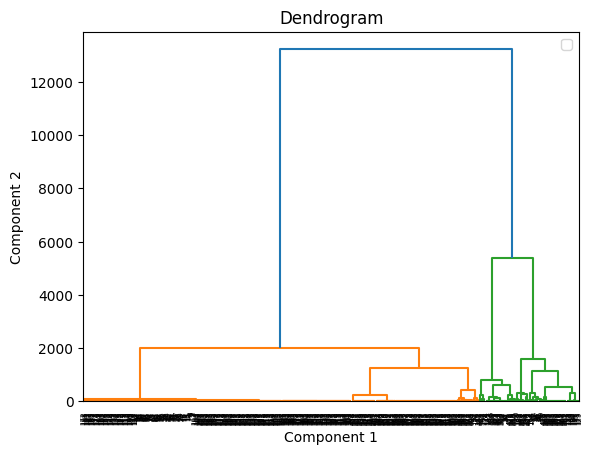

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [ ]:
print('Largest distance = Optimal number of clusters')
print('Optimal number of clusters = 2')

Largest distance = Optimal number of clusters
Optimal number of clusters = 2


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<ipython-input-41-b040ca3a9974>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1], cmap = 'viridis', marker = 'o')


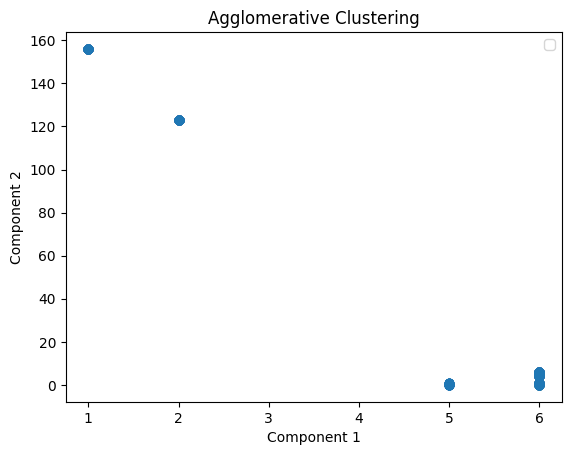

In [ ]:
plt.scatter(x[:,0],x[:,1], cmap = 'viridis', marker = 'o')
plt.title('Agglomerative Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()